- 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 학습은 신경망이 학습할 수 있도록 해주는 지표인 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표임
- 이번 장에서는 손실함수의 값을 가급적 작게 만드는 기법으로 함수의 기울기를 활용하는 경사법을 다룸

### Ch4.2 손실함수
- 평균 제곱 오차 (Mean Square Error, MSE)

In [1]:
### 데이터 하나를 대상으로 한 구현
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


- 교차 엔트로피 오차 (Cross Entropy Error, CEE)

In [2]:
### 데이터 하나를 대상으로 한 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


- 미니 배치 학습 : 빅데이터의 일부를 추려 전체의 '근사치'를 이용하는 방법

In [3]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = t_train[batch_mask]

In [5]:
np.random.choice(60000, 10)

array([45488, 36497,  8252, 43884, 18674, 26530, 11089, 29098,  5033,
        8938])

- (배치용) 교차 엔트로피 오차 구현하기

In [6]:
### 미니배치 같은 배치 데이터를 대상으로 한 구현 (one-hot encoding)
def cross_entropy_error_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [7]:
### 레이블이 원-핫 인코딩이 아닌 숫자로 주어졌을 때의 구현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batach_size = y.shape[0]
    return -np.sum(np.log(y[np.range(batch_size), t])) / batch_size

### Ch4.3 수치 미분
- 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정하는데 기울기를 구하는 방법 중 하나로 수치 미분을 사용

In [8]:
### 나쁜 구현의 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x-h)-f(x)) / h

### 개선점1: 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 된다.
### 개선점2: x위치의 함수의 기울기가 아닌 (x+h)와 x사이의 기울기에 해당
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

- 수치 미분의 예 <br>
y = 0.01x**2 + 0.1x

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

<Figure size 640x480 with 1 Axes>

0.1999999999990898
0.2999999999986347


0.1999999999990898
0.2999999999986347


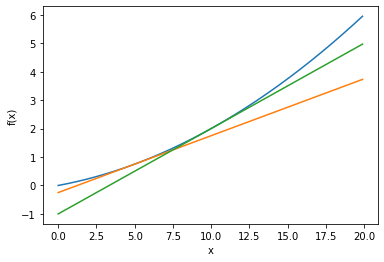

In [10]:
### 앞서 구한 수치 미분 값을 기울기로 하는 직선 (함수의 접선)
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
 
    
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
tf2 = tangent_line(function_1, 10)
y2 = tf1(x)
y3 = tf2(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

- 편미분 <br>
편미분은 변수가 여럿인 함수에 대한 미분으로, 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함. <br>
단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정해야함.

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2
#     return np.sum(x**2)

In [12]:
### Problem1) x0 = 3, x1 = 4일때 x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [13]:
### Problem2) x0 = 3, x1 = 4일때 x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### Ch4.4 기울기 (Gradient)
- 모든 변수의 편미분을 벡터로 정리한 것

In [14]:
def numerical_gradient(f, x):
    h = 1e-4  #0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원
        
    return grad

In [15]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


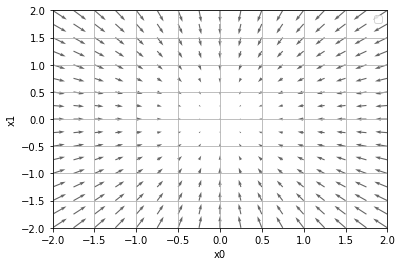

In [16]:
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")   #,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


- 경사하강법 (Gradient descent) : 기울기를 이용하여 함수의 최솟값(또는 가능한 작은 값)을 찾으려는 경사법

In [17]:
### f는 최적화하려는 함수, init_x는 초깃값, lr은 학습률, step_num은 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x  = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [18]:
### Problem3) 
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

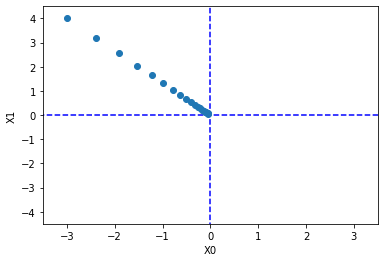

In [19]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

- 학습률(learning rate) : 매개변수 값을 얼마나 갱신하느냐를 정하는 것 <br>
학습률 같은 매개변수는 하이퍼파라미터(Hyper-parameter)라고 하며, 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수임. <br>
하이퍼파라미터의 경우 사람이 직접 설정해야하는 매개변수로, 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 과정을 거쳐야 함.

In [20]:
# 학습률이 너무 큰 예: lr = 10.0
# 결과는 너무 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [21]:
# 학습률이 너무 작은 예: lr = 1e-10
# 결과는 거의 갱신되지 않은 채로 종료
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

- 신경망에서의 기울기 : 신경망 학습에서의 기울기는 가중치 매개변수에 대한 손실함수의 기울기

In [22]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 정규분호로 정규화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error_onehot(y, t)
        return loss
    
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

# x는 입력데이터, t는 정답레이블

In [23]:
net = simpleNet()
print(net.W)

[[ 1.15580056 -0.01439973 -1.36145666]
 [ 0.92482004 -1.35644933  2.08856914]]


In [24]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.52581837 -1.22944423  1.06283823]


In [25]:
np.argmax(p)

0

In [26]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.9894807367886924

In [27]:
# 기울기 구하기
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.35440101  0.02253718 -0.37693819]
 [ 0.53160151  0.03380577 -0.56540728]]


### Ch4.5 학습 알고리즘 구현하기

- 2층 신경망 클래스 구현하기

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치초기화
        # params: 신경망의 매개변수를 보관하는 변수
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x ,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x: 입력데이터, t: 정답레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error_onehot(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        # grads: 기울기 보관하는 변수
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [29]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [30]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [31]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


- 미니배치 학습 구현하기

In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# Hyperparameter
iters_num = 1  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1  # 미니배치크기
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 성능개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습경과기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 시험 데이터로 평가하기

In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1epoch당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

# Hyperparameter
iters_num = 1  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1  # 미니배치크기
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 성능개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습경과기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()